In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
custs = pd.read_excel("p1_customers.xlsx", engine='openpyxl')
custs.head()

Name    Customer_Segment  Customer_ID            Address  \
0     Pamela Wright  Store Mailing List            2   376 S Jasmine St   
1     Danell Valdez  Store Mailing List            7   12066 E Lake Cir   
2  Jessica Rinehart  Store Mailing List            8  7225 S Gaylord St   
3       Nancy Clark  Store Mailing List            9   4497 Cornish Way   
4       Andrea Brun  Store Mailing List           10     2316 E 5th Ave   

                City State    ZIP  Avg_Sale_Amount  Store_Number  \
0             Denver    CO  80224           227.90           100   
1  Greenwood Village    CO  80111            55.00           105   
2         Centennial    CO  80122           212.57           101   
3             Denver    CO  80239           195.31           105   
4             Denver    CO  80206           110.55           100   

  Responded_to_Last_Catalog  Avg_Num_Products_Purchased  #_Years_as_Customer  
0                        No                           1                    6  
1                       Yes                           1                    6  
2                        No                           1                    3  
3                       Yes                           1                    6  
4                       Yes                           1                    2

In [3]:
responses = custs.groupby(["Responded_to_Last_Catalog"], as_index=False).sum()
responses

Responded_to_Last_Catalog  Customer_ID        ZIP  Avg_Sale_Amount  \
0                        No      3657334  176588445        922719.35   
1                       Yes       256299   13704472         26744.12   

   Store_Number  Avg_Num_Products_Purchased  #_Years_as_Customer  
0        229884                        7688                 9923  
1         17823                         262                  766

In [4]:
segments = custs.groupby(["Customer_Segment"], as_index=False).sum()
segments

Customer_Segment  Customer_ID       ZIP  Avg_Sale_Amount  \
0              Credit Card Only       871865  39580865        337243.40   
1             Loyalty Club Only       956891  46393539        229476.56   
2  Loyalty Club and Credit Card       306541  15543354        208386.94   
3            Store Mailing List      1778336  88775159        174356.57   

   Store_Number  Avg_Num_Products_Purchased  #_Years_as_Customer  
0         51599                        2797                 2224  
1         60317                        2094                 2647  
2         20244                        1416                  944  
3        115547                        1643                 4874

In [5]:
custs.corr()

Customer_ID       ZIP  Avg_Sale_Amount  \
Customer_ID                    1.000000  0.002159         0.038235   
ZIP                            0.002159  1.000000         0.007973   
Avg_Sale_Amount                0.038235  0.007973         1.000000   
Store_Number                  -0.023323 -0.148906        -0.007946   
Avg_Num_Products_Purchased     0.060136  0.001790         0.855754   
#_Years_as_Customer            0.015164  0.001643         0.029782   

                            Store_Number  Avg_Num_Products_Purchased  \
Customer_ID                    -0.023323                    0.060136   
ZIP                            -0.148906                    0.001790   
Avg_Sale_Amount                -0.007946                    0.855754   
Store_Number                    1.000000                   -0.011525   
Avg_Num_Products_Purchased     -0.011525                    1.000000   
#_Years_as_Customer            -0.009573                    0.043346   

                            #_Years_as_Customer  
Customer_ID                            0.015164  
ZIP                                    0.001643  
Avg_Sale_Amount                        0.029782  
Store_Number                          -0.009573  
Avg_Num_Products_Purchased             0.043346  
#_Years_as_Customer                    1.000000

# Visualizations


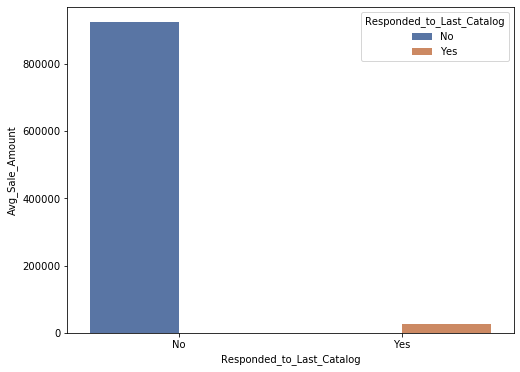

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(responses["Responded_to_Last_Catalog"], responses["Avg_Sale_Amount"], hue=responses["Responded_to_Last_Catalog"], palette='deep')

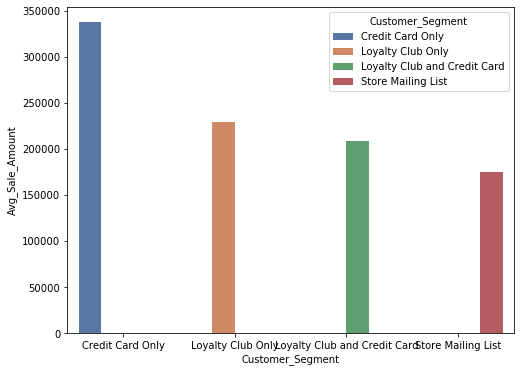

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(segments["Customer_Segment"], segments["Avg_Sale_Amount"], hue=segments["Customer_Segment"], palette='deep')

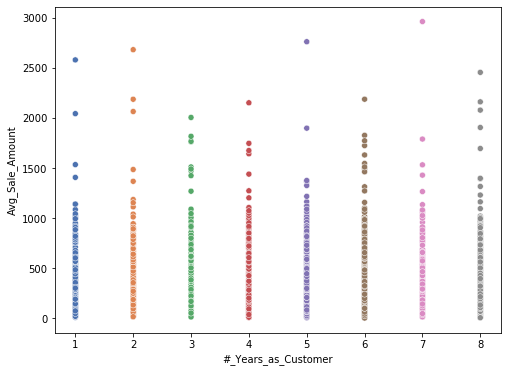

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= custs['#_Years_as_Customer'], y= custs["Avg_Sale_Amount"], hue=custs["#_Years_as_Customer"], palette='deep', legend=False)

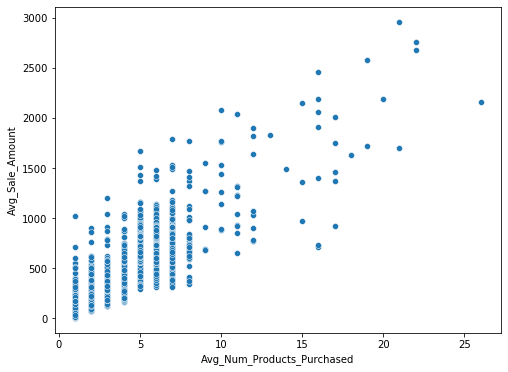

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= custs['Avg_Num_Products_Purchased'], y= custs["Avg_Sale_Amount"])

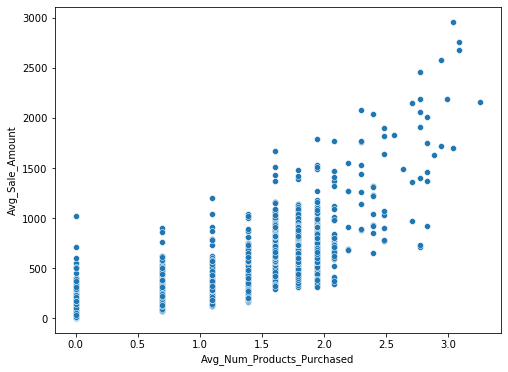

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= np.log(custs['Avg_Num_Products_Purchased']), y= custs["Avg_Sale_Amount"])

In [11]:
custs['Avg_Num_Products_Purchased'].corr(custs["Avg_Sale_Amount"])

0.8557542170755579

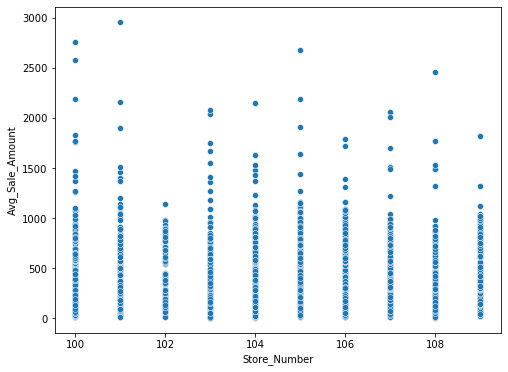

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= custs['Store_Number'], y= custs["Avg_Sale_Amount"])

<Figure size 576x432 with 0 Axes>

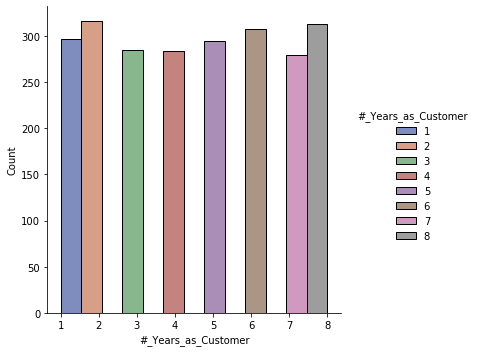

In [13]:
plt.figure(figsize=(8, 6))
sns.displot(custs, x="#_Years_as_Customer", hue="#_Years_as_Customer", palette="dark")

<Figure size 576x432 with 0 Axes>

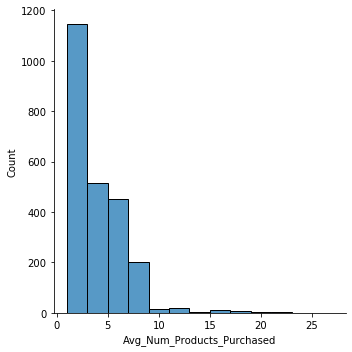

In [14]:
plt.figure(figsize=(8, 6))
sns.displot(custs, x="Avg_Num_Products_Purchased", binwidth=2)

<Figure size 576x432 with 0 Axes>

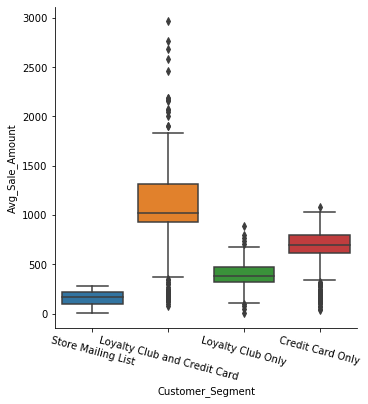

In [15]:
plt.figure(figsize=(8, 6))
x = sns.catplot(x="Customer_Segment", y="Avg_Sale_Amount", kind="box", data=custs)
x.set_xticklabels(rotation=-15)

<Figure size 576x432 with 0 Axes>

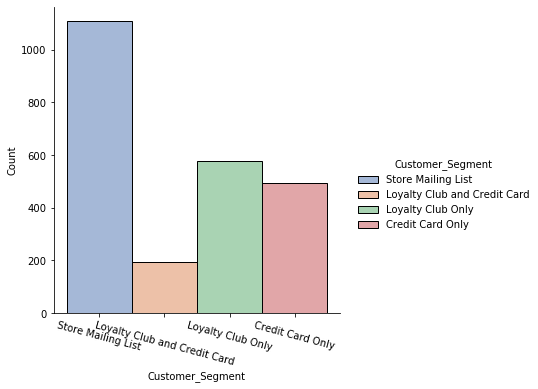

In [16]:
plt.figure(figsize=(8, 6))
x = sns.displot(custs, x="Customer_Segment", binwidth=2, hue="Customer_Segment", palette="deep")
x.set_xticklabels(rotation=-15)

<Figure size 576x432 with 0 Axes>

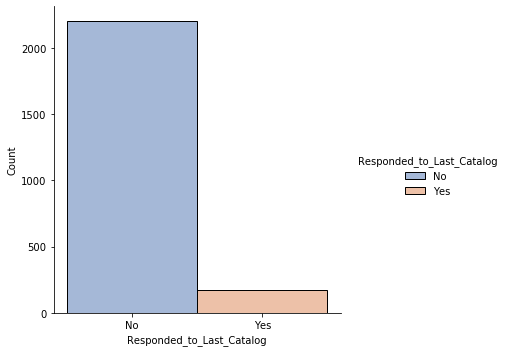

In [17]:
plt.figure(figsize=(8, 6))
x = sns.displot(custs, x="Responded_to_Last_Catalog", binwidth=2, hue="Responded_to_Last_Catalog", palette="deep")

# OLS Regression summaries to determine the statistically significant variables

In [18]:
cities = custs[["Avg_Sale_Amount", "City"]]
cities = pd.get_dummies(cities, drop_first=True)
print(cities.shape)
cities.head()

(2375, 27)


Avg_Sale_Amount  City_Aurora  City_Boulder  City_Brighton  City_Broomfield  \
0           227.90            0             0              0                0   
1            55.00            0             0              0                0   
2           212.57            0             0              0                0   
3           195.31            0             0              0                0   
4           110.55            0             0              0                0   

   City_Castle Pines  City_Centennial  City_Commerce City  City_Denver  \
0                  0                0                   0            1   
1                  0                0                   0            0   
2                  0                1                   0            0   
3                  0                0                   0            1   
4                  0                0                   0            1   

   City_Edgewater  ...  City_Littleton  City_Lone Tree  City_Louisville  \
0               0  ...               0               0                0   
1               0  ...               0               0                0   
2               0  ...               0               0                0   
3               0  ...               0               0                0   
4               0  ...               0               0                0   

   City_Morrison  City_Northglenn  City_Parker  City_Superior  City_Thornton  \
0              0                0            0              0              0   
1              0                0            0              0              0   
2              0                0            0              0              0   
3              0                0            0              0              0   
4              0                0            0              0              0   

   City_Westminster  City_Wheat Ridge  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 27 columns]

In [19]:
import statsmodels.api as sm
y = cities["Avg_Sale_Amount"]
X = cities.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7291
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.837
Time:                        19:03:59   Log-Likelihood:                -17204.
No. Observations:                2375   AIC:                         3.446e+04
Df Residuals:                    2348   BIC:                         3.462e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    386.0866     21.673     17.814      0.000     343.586     428.587
City_Aurora               18.7545     26.553      0.706      0.480     -33.316      70.825
City_Boulder             154.1034    197.849      0.779      0.436    -233.873     542.080
City_Brighton           -291.1566    241.829     -1.204      0.229    -765.377     183.064
City_Broomfield            7.4088     37.389      0.198      0.843     -65.909      80.727
City_Castle Pines       -193.8766    241.829     -0.802      0.423    -668.097     280.344
City_Centennial          -13.8161     44.240     -0.312      0.755    -100.570      72.938
City_Commerce City       296.7284    109.873      2.701      0.007      81.271     512.186
City_Denver               18.5508     24.989      0.742      0.458     -30.451      67.553
City_Edgewater            76.8751    100.689      0.763      0.445    -120.574     274.324
City_Englewood            -9.8057     50.414     -0.195      0.846    -108.666      89.055
City_Golden              -12.7192     81.094     -0.157      0.875    -171.742     146.304
City_Greenwood Village   -60.0380     93.579     -0.642      0.521    -243.545     123.469
City_Henderson          -171.6966    341.310     -0.503      0.615    -840.998     497.604
City_Highlands Ranch       4.9043     74.258      0.066      0.947    -140.713     150.522
City_Lafayette           -41.9546    153.865     -0.273      0.785    -343.679     259.770
City_Lakewood             31.6516     31.692      0.999      0.318     -30.496      93.799
City_Littleton            -9.7269     45.620     -0.213      0.831     -99.186      79.732
City_Lone Tree           468.7834    341.310      1.373      0.170    -200.518    1138.084
City_Louisville          -37.6191    171.684     -0.219      0.827    -374.288     299.049
City_Morrison            126.6077    130.554      0.970      0.332    -129.406     382.622
City_Northglenn          -29.3324     72.829     -0.403      0.687    -172.148     113.483
City_Parker              -51.0592     69.043     -0.740      0.460    -186.450      84.332
City_Superior            -81.0666    115.591     -0.701      0.483    -307.737     145.604
City_Thornton              8.1985     61.520      0.133      0.894    -112.440     128.837
City_Westminster           9.4303     42.833      0.220      0.826     -74.565      93.426
City_Wheat Ridge          43.8747     51.169      0.857      0.391     -56.467     144.217
==============================================================================
Omnibus:                     1045.683   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6267.459
Skew:                           2.004   Prob(JB):                         0.00
Kurtosis:                       9.875

In [20]:
zips = custs[["Avg_Sale_Amount", "ZIP"]]
zips["ZIP"]= zips.ZIP.astype("category", copy=False)
zips = pd.get_dummies(zips, drop_first=True)
print(zips.shape)
zips.head()

(2375, 86)


Avg_Sale_Amount  ZIP_80003  ZIP_80004  ZIP_80005  ZIP_80007  ZIP_80010  \
0           227.90          0          0          0          0          0   
1            55.00          0          0          0          0          0   
2           212.57          0          0          0          0          0   
3           195.31          0          0          0          0          0   
4           110.55          0          0          0          0          0   

   ZIP_80011  ZIP_80012  ZIP_80013  ZIP_80014  ...  ZIP_80247  ZIP_80249  \
0          0          0          0          0  ...          0          0   
1          0          0          0          0  ...          0          0   
2          0          0          0          0  ...          0          0   
3          0          0          0          0  ...          0          0   
4          0          0          0          0  ...          0          0   

   ZIP_80260  ZIP_80303  ZIP_80305  ZIP_80401  ZIP_80403  ZIP_80465  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   ZIP_80602  ZIP_80640  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 86 columns]

In [21]:
y = zips["Avg_Sale_Amount"]
X = zips.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8761
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.782
Time:                        19:03:59   Log-Likelihood:                -17176.
No. Observations:                2375   AIC:                         3.452e+04
Df Residuals:                    2289   BIC:                         3.502e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.7723     61.223      6.236      0.000     261.715     501.830
ZIP_80003     29.6849     76.309      0.389      0.697    -119.957     179.327
ZIP_80004    -16.6265     72.115     -0.231      0.818    -158.045     124.792
ZIP_80005     13.7187     73.381      0.187      0.852    -130.181     157.618
ZIP_80007    -14.5165    142.644     -0.102      0.919    -294.242     265.209
ZIP_80010     74.0606     88.871      0.833      0.405    -100.215     248.336
ZIP_80011     -7.8434     80.714     -0.097      0.923    -166.123     150.436
ZIP_80012     51.6589     71.194      0.726      0.468     -87.953     191.270
ZIP_80013      6.3222     68.287      0.093      0.926    -127.589     140.233
ZIP_80014     67.5356     73.381      0.920      0.357     -76.364     211.435
ZIP_80015     -0.7864     70.988     -0.011      0.991    -139.993     138.420
ZIP_80016      1.6900     81.566      0.021      0.983    -158.261     161.641
ZIP_80017    -47.3341     77.075     -0.614      0.539    -198.478     103.810
ZIP_80018    149.4544    206.106      0.725      0.468    -254.719     553.628
ZIP_80020      8.3685     71.300      0.117      0.907    -131.452     148.189
ZIP_80021     28.3244     78.542      0.361      0.718    -125.697     182.346
ZIP_80022    301.0427    123.966      2.428      0.015      57.945     544.140
ZIP_80023     31.5877    123.966      0.255      0.799    -211.510     274.685
ZIP_80026    -37.6403    164.277     -0.229      0.819    -359.788     284.507
ZIP_80027    -63.3838    112.633     -0.563      0.574    -284.257     157.490
ZIP_80030    -58.1050    119.630     -0.486      0.627    -292.699     176.489
ZIP_80031     12.1337     77.348      0.157      0.875    -139.546     163.813
ZIP_80033     28.6921     79.931      0.359      0.720    -128.053     185.437
ZIP_80108   -189.5623    248.687     -0.762      0.446    -677.238     298.113
ZIP_80110    -14.5138     99.316     -0.146      0.884    -209.273     180.245
ZIP_80111    -28.7132     96.339     -0.298      0.766    -217.634     160.208
ZIP_80112    -21.0100    101.012     -0.208      0.835    -219.095     177.075
ZIP_80113     20.6973     93.809      0.221      0.825    -163.262     204.657
ZIP_80120    -27.3769    107.212     -0.255      0.798    -237.620     182.866
ZIP_80121    102.4527    123.966      0.826      0.409    -140.645     345.550
ZIP_80122    -37.6673    123.966     -0.304      0.761    -280.765     205.430
ZIP_80123     34.6849     88.871      0.390      0.696    -139.590     208.960
ZIP_80124    477.1077    248.687      1.919      0.055     -10.568     964.783
ZIP_80126     77.4866    129.068      0.600      0.548    -175.617     330.590
ZIP_80127    -51.9765    109.762     -0.474      0.636    -267.221     163.267
ZIP_80128    -54.7698    115.892     -0.473      0.637    -282.035     172.495
ZI

In [22]:
stores = custs[["Avg_Sale_Amount", "Store_Number"]]
stores["Store_Number"]= stores.Store_Number.astype("category", copy=False)
stores = pd.get_dummies(stores, drop_first=True)
print(stores.shape)
stores.head()

(2375, 10)


Avg_Sale_Amount  Store_Number_101  Store_Number_102  Store_Number_103  \
0           227.90                 0                 0                 0   
1            55.00                 0                 0                 0   
2           212.57                 1                 0                 0   
3           195.31                 0                 0                 0   
4           110.55                 0                 0                 0   

   Store_Number_104  Store_Number_105  Store_Number_106  Store_Number_107  \
0                 0                 0                 0                 0   
1                 0                 1                 0                 0   
2                 0                 0                 0                 0   
3                 0                 1                 0                 0   
4                 0                 0                 0                 0   

   Store_Number_108  Store_Number_109  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [23]:
y = stores["Avg_Sale_Amount"]
X = stores.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8315
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.587
Time:                        19:04:29   Log-Likelihood:                -17210.
No. Observations:                2375   AIC:                         3.444e+04
Df Residuals:                    2365   BIC:                         3.450e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              412.5055     18.843     21.891      0.000     375.554     449.457
Store_Number_101   -15.0416     27.829     -0.540      0.589     -69.614      39.531
Store_Number_102   -32.0775     41.435     -0.774      0.439    -113.330      49.175
Store_Number_103    -6.0123     29.488     -0.204      0.838     -63.837      51.812
Store_Number_104   -26.2326     27.996     -0.937      0.349     -81.132      28.667
Store_Number_105     6.7354     27.103      0.249      0.804     -46.413      59.884
Store_Number_106   -30.4835     27.642     -1.103      0.270     -84.689      23.722
Store_Number_107     1.4974     29.449      0.051      0.959     -56.251      59.246
Store_Number_108   -53.1732     30.104     -1.766      0.077    -112.207       5.861
Store_Number_109    14.6572     32.249      0.455      0.650     -48.582      77.896
==============================================================================
Omnibus:                     1063.803   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6614.930
Skew:                           2.032   Prob(JB):                         0.00
Kurtosis:                      10.095   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
csegs = custs[["Avg_Sale_Amount", "Customer_Segment"]]
csegs = pd.get_dummies(csegs, drop_first=True)
print(csegs.shape)
csegs.head()

(2375, 4)


Avg_Sale_Amount  Customer_Segment_Loyalty Club Only  \
0           227.90                                   0   
1            55.00                                   0   
2           212.57                                   0   
3           195.31                                   0   
4           110.55                                   0   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Customer_Segment_Store Mailing List  
0                                    1  
1                                    1  
2                                    1  
3                                    1  
4                                    1

In [25]:
y = csegs["Avg_Sale_Amount"]
X = csegs.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1865.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:04:31   Log-Likelihood:                -15775.
No. Observations:                2375   AIC:                         3.156e+04
Df Residuals:                    2371   BIC:                         3.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           682.6789      8.354     81.722      0.000     666.298     699.060
Customer_Segment_Loyalty Club Only             -286.3464     11.372    -25.180      0.000    -308.647    -264.046
Customer_Segment_Loyalty Club and Credit Card   391.4805     15.732     24.885      0.000     360.631     422.330
Customer_Segment_Store Mailing List            -525.3174     10.045    -52.298      0.000    -545.015    -505.620
==============================================================================
Omnibus:                      863.869   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45477.200
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                      24.357   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:

resp = custs[["Avg_Sale_Amount", "Responded_to_Last_Catalog"]]
resp = pd.get_dummies(resp, drop_first=True)
print(resp.shape)
resp.head()

(2375, 2)


Avg_Sale_Amount  Responded_to_Last_Catalog_Yes
0           227.90                              0
1            55.00                              1
2           212.57                              0
3           195.31                              1
4           110.55                              1

In [27]:
y = resp["Avg_Sale_Amount"]
X = resp.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     98.22
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.03e-22
Time:                        19:04:32   Log-Likelihood:                -17166.
No. Observations:                2375   AIC:                         3.434e+04
Df Residuals:                    2373   BIC:                         3.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           418.6567      7.101     58.959      0.000     404.732     432.581
Responded_to_Last_Catalog_Yes  -262.2583     26.463     -9.910      0.000    -314.151    -210.365
==============================================================================
Omnibus:                     1071.932   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7096.962
Skew:                           2.025   Prob(JB):                         0.00
Kurtosis:                      10.437   Cond. No.                         3.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
years = custs[["Avg_Sale_Amount", "#_Years_as_Customer"]]
print(years.shape)
years.head()

(2375, 2)


Avg_Sale_Amount  #_Years_as_Customer
0           227.90                    6
1            55.00                    6
2           212.57                    3
3           195.31                    6
4           110.55                    2

In [29]:
y = years["Avg_Sale_Amount"]
X = years.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.107
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.147
Time:                        19:04:34   Log-Likelihood:                -17213.
No. Observations:                2375   AIC:                         3.443e+04
Df Residuals:                    2373   BIC:                         3.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 380.0388     15.283     24.867      0.000     350.070     410.008
#_Years_as_Customer     4.3850      3.021      1.451      0.147      -1.539      10.309
==============================================================================
Omnibus:                     1063.977   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6609.369
Skew:                           2.032   Prob(JB):                         0.00
Kurtosis:                      10.090   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
n_pdts = custs[["Avg_Sale_Amount", "Avg_Num_Products_Purchased"]]
print(n_pdts.shape)
n_pdts.head()

(2375, 2)


Avg_Sale_Amount  Avg_Num_Products_Purchased
0           227.90                           1
1            55.00                           1
2           212.57                           1
3           195.31                           1
4           110.55                           1

In [31]:
y = n_pdts["Avg_Sale_Amount"]
X = n_pdts.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     6492.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:04:38   Log-Likelihood:                -15649.
No. Observations:                2375   AIC:                         3.130e+04
Df Residuals:                    2373   BIC:                         3.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         44.0152      5.704      7.716      0.000      32.829      55.201
Avg_Num_Products_Purchased   106.2802      1.319     80.572      0.000     103.694     108.867
==============================================================================
Omnibus:                      582.044   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.856
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Data Cleaning

In [32]:
custs_df = custs.drop(["Name", "Customer_ID", "State", "Address", "ZIP", "City", "Store_Number", "#_Years_as_Customer", "Responded_to_Last_Catalog"], axis=1)
custs_df.head()

Customer_Segment  Avg_Sale_Amount  Avg_Num_Products_Purchased
0  Store Mailing List           227.90                           1
1  Store Mailing List            55.00                           1
2  Store Mailing List           212.57                           1
3  Store Mailing List           195.31                           1
4  Store Mailing List           110.55                           1

In [33]:
custs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_Segment            2375 non-null   object 
 1   Avg_Sale_Amount             2375 non-null   float64
 2   Avg_Num_Products_Purchased  2375 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 55.8+ KB


In [34]:
custs_df.describe()

Avg_Sale_Amount  Avg_Num_Products_Purchased
count      2375.000000                 2375.000000
mean        399.774093                    3.347368
std         340.115808                    2.738568
min           1.220000                    1.000000
25%         168.925000                    1.000000
50%         281.320000                    3.000000
75%         572.400000                    5.000000
max        2963.490000                   26.000000

In [35]:
custs_df = pd.get_dummies(custs_df, drop_first=True)
custs_df.head()

Avg_Sale_Amount  Avg_Num_Products_Purchased  \
0           227.90                           1   
1            55.00                           1   
2           212.57                           1   
3           195.31                           1   
4           110.55                           1   

   Customer_Segment_Loyalty Club Only  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Customer_Segment_Store Mailing List  
0                                    1  
1                                    1  
2                                    1  
3                                    1  
4                                    1

# Modelling

In [36]:
y = custs_df["Avg_Sale_Amount"]
X = custs_df.drop(["Avg_Sale_Amount"], axis = 1)
modelreg = LinearRegression().fit(X, y)

In [37]:
modelreg.score(X, y)

0.8368777093556734

In [38]:
modelreg.coef_

array([  66.97620492, -149.35572194,  281.83876492, -245.4177445 ])

In [39]:
modelreg.intercept_

303.46347131467235

In [40]:
df = custs[["Avg_Sale_Amount", "Avg_Num_Products_Purchased", "Customer_Segment"]]
df = pd.get_dummies(df, drop_first=True)
print(df.shape)
df.head()

(2375, 5)


Avg_Sale_Amount  Avg_Num_Products_Purchased  \
0           227.90                           1   
1            55.00                           1   
2           212.57                           1   
3           195.31                           1   
4           110.55                           1   

   Customer_Segment_Loyalty Club Only  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Customer_Segment_Store Mailing List  
0                                    1  
1                                    1  
2                                    1  
3                                    1  
4                                    1

In [41]:
y = df["Avg_Sale_Amount"]
X = df.drop(['Avg_Sale_Amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:05:45   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           303.4635     10.576     28.694      0.000     282.725     324.202
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
Customer_Segment_Loyalty Club Only             -149.3557      8.973    -16.645      0.000    -166.951    -131.760
Customer_Segment_Loyalty Club and Credit Card   281.8388     11.910     23.664      0.000     258.484     305.194
Customer_Segment_Store Mailing List            -245.4177      9.768    -25.125      0.000    -264.572    -226.263
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adapting the testing set to match the training set
- Drop the features not used in training
- Do the necessary changes(changing the store number to categorical)
- Feature engineering to obtain some features used in training
- Get dummy variables

In [42]:
ml = pd.read_excel("p1-mailinglist.xlsx", engine='openpyxl')
ml.head()

Name              Customer_Segment  Customer_ID  \
0       A Giametti             Loyalty Club Only         2213   
1     Abby Pierson  Loyalty Club and Credit Card         2785   
2    Adele Hallman             Loyalty Club Only         2931   
3  Alejandra Baird             Loyalty Club Only         2231   
4     Alice Dewitt             Loyalty Club Only         2530   

               Address        City State    ZIP  Store_Number  \
0    5326 S Lisbon Way  Centennial    CO  80015           105   
1    4344 W Roanoke Pl      Denver    CO  80236           101   
2   5219 S Delaware St   Englewood    CO  80110           101   
3     2301 Lawrence St      Denver    CO  80205           103   
4  5549 S Hannibal Way  Centennial    CO  80015           104   

   Avg_Num_Products_Purchased  #_Years_as_Customer  Score_No  Score_Yes  
0                           3                  0.2  0.694964   0.305036  
1                           6                  0.6  0.527275   0.472725  
2                           7                  0.9  0.421118   0.578882  
3                           2                  0.6  0.694862   0.305138  
4                           4                  0.5  0.612294   0.387706

In [43]:
ml.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased',
       '#_Years_as_Customer', 'Score_No', 'Score_Yes'],
      dtype='object')

In [44]:
scores = ml[["Score_No", "Score_Yes"]]
scores.head()

Score_No  Score_Yes
0  0.694964   0.305036
1  0.527275   0.472725
2  0.421118   0.578882
3  0.694862   0.305138
4  0.612294   0.387706

In [45]:

# ml["Responded_to_Last_Catalog"] = np.where((ml["Score_Yes"] > ml["Score_No"]), "Yes", "No")
ml.drop(["Name", "Customer_ID", "State", "Address", "ZIP", "City","#_Years_as_Customer", "Score_No", "Score_Yes", "Store_Number", "#_Years_as_Customer"], axis=1, inplace=True)
ml_df = pd.get_dummies(ml, drop_first=True)
ml_df.head()

Avg_Num_Products_Purchased  Customer_Segment_Loyalty Club Only  \
0                           3                                   1   
1                           6                                   0   
2                           7                                   1   
3                           2                                   1   
4                           4                                   1   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

   Customer_Segment_Store Mailing List  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

# Predicting the average sales for the 250 new customers
- 

In [50]:
preds = modelreg.predict(ml_df)
prediction = pd.DataFrame(preds, columns=["Predicted_Avg_Sale_Amount"])

prediction = pd.concat([prediction, scores], axis=1)

prediction["Products_worth"] = prediction["Predicted_Avg_Sale_Amount"]*prediction["Score_Yes"]
prediction["expected_revenue"] = (prediction["Products_worth"] * 0.5) - 6.5
expected_revenue = prediction["Products_worth"].sum()*0.5 - (6.5*250)
print(f"\nTotal Profit Expected: {prediction['expected_revenue'].sum()}")


Total Profit Expected: 21987.435686545326


In [47]:
prediction.head()

Predicted_Avg_Sale_Amount  Score_No  Score_Yes  Products_worth
0                 355.036364  0.694964   0.305036      108.298804
1                 987.159466  0.527275   0.472725      466.654501
2                 622.941184  0.421118   0.578882      360.609345
3                 288.060159  0.694862   0.305138       87.898046
4                 422.012569  0.612294   0.387706      163.616744

In [51]:
prediction.describe()

Predicted_Avg_Sale_Amount    Score_No   Score_Yes  Products_worth  \
count                 250.000000  250.000000  250.000000      250.000000   
mean                  553.168520    0.659332    0.340668      188.899485   
std                   287.792389    0.190043    0.190044      144.788805   
min                   125.021932    0.000002    0.185729       24.570042   
25%                   355.036364    0.612926    0.210961       95.199827   
50%                   504.392086    0.742010    0.257990      142.968367   
75%                   705.320701    0.789039    0.387074      236.989230   
max                  2393.659769    0.814271    0.999998      805.325186   

       expected_revenue  
count        250.000000  
mean          87.949743  
std           72.394403  
min            5.785021  
25%           41.099914  
50%           64.984183  
75%          111.994615  
max          396.162593

In [52]:
custs.Customer_Segment.unique()

array(['Store Mailing List', 'Loyalty Club and Credit Card',
       'Loyalty Club Only', 'Credit Card Only'], dtype=object)

In [53]:
custs.State.nunique()

1

In [54]:
custs.Name.nunique()

2366

In [55]:
custs.Store_Number.nunique()

10

In [56]:
custs.ZIP.nunique()

86

In [57]:
custs.City.nunique()

27

In [58]:
custs.Customer_Segment.nunique()

4

In [59]:
custs.groupby(["Customer_Segment"]).median().Avg_Sale_Amount

Customer_Segment
Credit Card Only                 698.600
Loyalty Club Only                384.760
Loyalty Club and Credit Card    1015.655
Store Mailing List               166.915
Name: Avg_Sale_Amount, dtype: float64

In [66]:
custs.Name.duplicated().any()

True

In [67]:
custs.Customer_ID.nunique()

2375

In [68]:
custs.Address.nunique()

2321